In [7]:
import astropy
import photutils
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
from math import log

#DIR = "/Users/aarushgupta/Desktop/aarushg/20241002_P2/NGC7265_P2"
# PFX = PFX = "P2_NGC 7265"
DIR = "/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2"
PFX = "calIC 10"
filters = ["r'", "g'"]
background_bounds = (3000, 3100, 5000, 5100)

In [11]:
filter_mean_images = dict()
filter_mean_stds = dict()

for filter in filters:

    # print(os.listdir(SPIRAL_DIR))

    FILE_PATH_PFX = DIR + "/" + PFX + f"_{filter}_1x1_300.000secs"

    all_filenames = glob.glob(f"{FILE_PATH_PFX}*.fit")

    images = []

    for filename in all_filenames:
        print(filename)
        data = astropy.io.fits.open(filename)[0].data
        h_t, h_b, w_t, w_b = background_bounds
        background = np.median(data[h_t:h_b, w_t:w_b])
        images.append(np.maximum(data - background, 1e-12))
        images.append(data)
    
    means = np.mean(images, axis=0)
    stds = np.std(images, axis=0)

    filter_mean_images[filter] = means

    # plt.imshow(np.log(means + 1), vmax=8)
    

/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2/calIC 10_r'_1x1_300.000secs_00000255.fit
950.0
/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2/calIC 10_r'_1x1_300.000secs_00000256.fit
952.0
/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2/calIC 10_r'_1x1_300.000secs_00000257.fit
959.0
/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2/calIC 10_g'_1x1_300.000secs_00000259.fit
1973.0
/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2/calIC 10_g'_1x1_300.000secs_00000261.fit
1981.0
/Users/aarushgupta/Desktop/aarushg/20241016_P2/Maffei1_P2/calIC 10_g'_1x1_300.000secs_00000260.fit
1980.0


In [12]:
print(filter_mean_images["g'"])

[[925.83333333 896.66666667 935.33333333 ... 885.16666667 915.5
  923.        ]
 [968.33333333 891.66666667 935.         ... 911.33333333 907.16666667
  925.        ]
 [898.66666667 883.5        910.33333333 ... 913.         921.
  945.33333333]
 ...
 [919.5        931.16666667 933.83333333 ... 924.83333333 891.
  860.5       ]
 [900.83333333 890.         926.         ... 916.33333333 917.83333333
  925.5       ]
 [898.33333333 953.66666667 905.16666667 ... 916.66666667 886.5
  903.33333333]]


In [13]:
x_offset = 20
y_offset = -20

shifted_g_image = filter_mean_images["g'"][100 + y_offset : -100, 100 + x_offset : -100]
shifted_r_image = filter_mean_images["r'"][100 : -100-y_offset , 100 : -100-x_offset]

print(shifted_g_image.shape)
print(shifted_r_image.shape)


(3996, 6032)
(3996, 6032)


In [14]:
filter_mean_images

{"r'": array([[427.83333333, 435.33333333, 422.33333333, ..., 423.33333333,
         440.        , 437.66666667],
        [438.16666667, 451.16666667, 456.        , ..., 477.66666667,
         478.33333333, 435.16666667],
        [421.16666667, 460.5       , 414.33333333, ..., 430.83333333,
         467.16666667, 452.5       ],
        ...,
        [439.16666667, 445.5       , 463.5       , ..., 448.66666667,
         441.5       , 426.83333333],
        [414.5       , 429.33333333, 455.        , ..., 442.5       ,
         460.33333333, 405.5       ],
        [428.5       , 436.16666667, 436.16666667, ..., 482.        ,
         432.        , 427.83333333]]),
 "g'": array([[925.83333333, 896.66666667, 935.33333333, ..., 885.16666667,
         915.5       , 923.        ],
        [968.33333333, 891.66666667, 935.        , ..., 911.33333333,
         907.16666667, 925.        ],
        [898.66666667, 883.5       , 910.33333333, ..., 913.        ,
         921.        , 945.33333333],
 

In [185]:
# Reference star, right star in UCAC4 583-120677 -- Spectroscopic Binary

ref_mR = 11.90
ref_mG = 11.85

fluxR_obs = np.sum(shifted_r_image[800:1200, 1950:2250])
fluxG_obs = np.sum(shifted_g_image[800:1200, 1950:2250])

print(fluxR_obs, fluxG_obs)

print(fluxR_obs / fluxG_obs)

rg_filter_delta = -2.5 * (np.log(fluxG_obs / fluxR_obs)) / np.log(10) - (ref_mG - ref_mR)

39121024.33333336 73940485.55555557
0.5290880096255194


In [186]:
rg_filter_delta

np.float64(-0.6411802012184202)

-2.923861540689389
-2.923861540689389
-0.11570877816658147
5.819588195769705


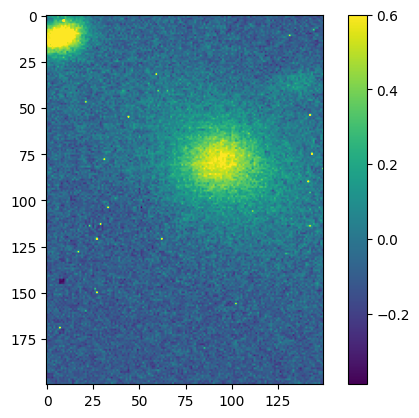

In [193]:
diff_image = -2.5 * (np.log(shifted_g_image) - np.log(shifted_r_image)) / np.log(10) - rg_filter_delta
print(np.min(diff_image))
# diff_image -= np.min(diff_image)
print(np.min(diff_image))
print(np.mean(diff_image))
print(np.max(diff_image))

plt.imshow(diff_image[1700:1900, 500:650], vmax=0.6)
plt.colorbar()

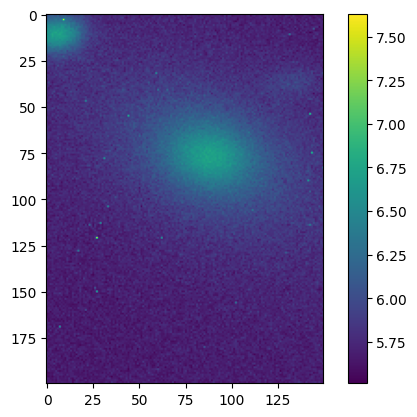

In [183]:
plt.imshow(np.log(shifted_r_image)[1700:1900, 500:650])
plt.colorbar()

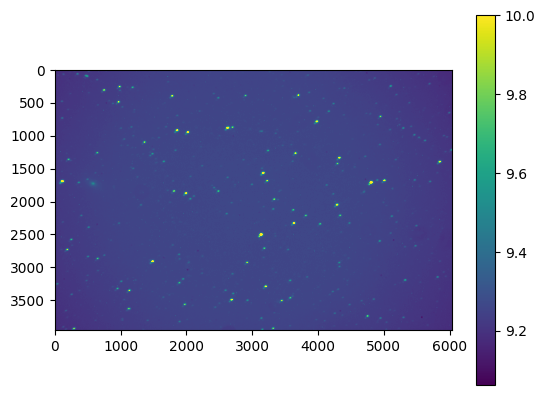

In [28]:
plt.imshow(np.log(shifted_g_image + 1e-6), vmax=10)
plt.colorbar()

73936777.08333333
5327.703703703704 590.7037037037037


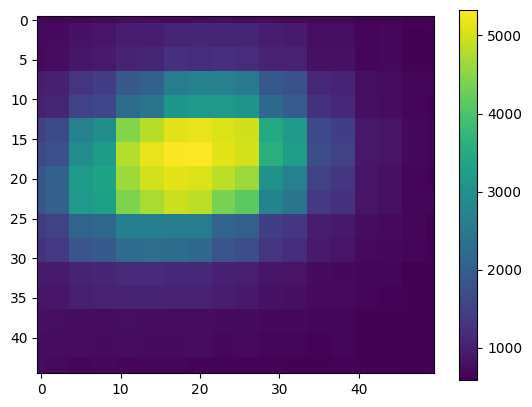

In [156]:
plt.imshow(shifted_g_image[975:1020, 2000:2050])
print(np.sum(shifted_g_image[800:1200, 1950:2250]))
print(np.max(shifted_g_image[975:1020, 2000:2050]), np.min(shifted_g_image[975:1020, 2000:2050]))
plt.colorbar()


39121024.33333336
10130.0 291.1666666666668


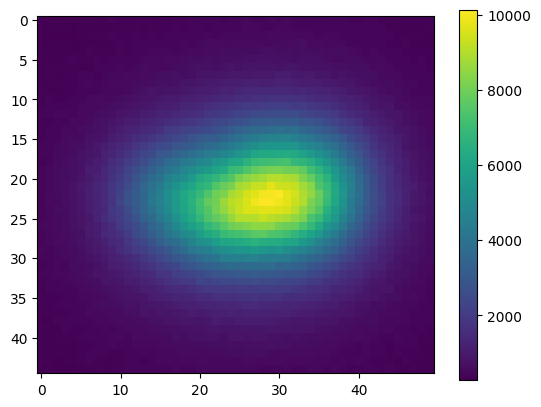

In [157]:
plt.imshow(shifted_r_image[975:1020, 2000:2050])
print(np.sum(shifted_r_image[800:1200, 1950:2250]))
print(np.max(shifted_r_image[975:1020, 2000:2050]), np.min(shifted_r_image[975:1020, 2000:2050]))
plt.colorbar()


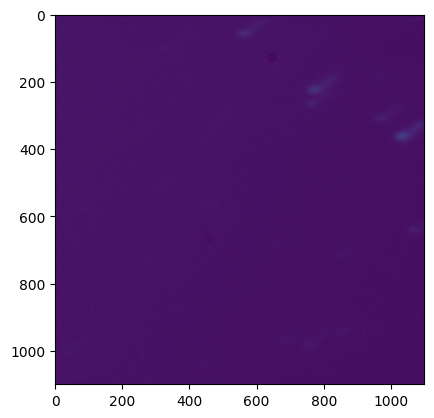

In [15]:
plt.imshow(np.log(shifted_g_image[2500:3600, 4500:5600]))

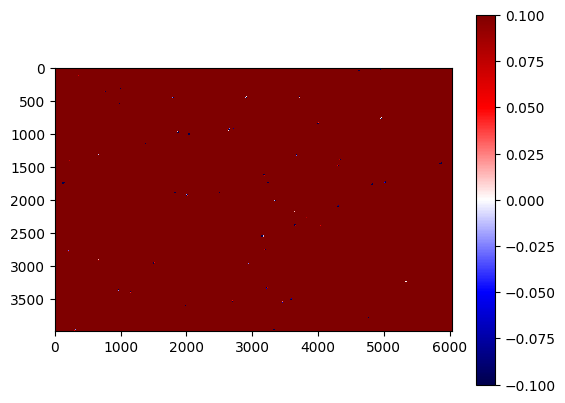

In [189]:
plt.imshow(np.log(shifted_g_image / shifted_r_image), vmin=-0.1, vmax=0.1, cmap="seismic")
plt.colorbar()